<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng02/A02_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Made by Boris Oskolkov for Assignment03 (CS5783)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import string
import pandas as pd
from IPython.display import Image

# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

 --------- start of a first problem --------------

So, we need to create update rule for 2-layer regression model. For that we need to find how to calculate changing of weights and biases for 1st and 2nd layer. Assume, that we have simple 1-perceptron model. I will use chain rule for deriving the update rule.

Denote x as input, y as output, z(n) as linear equation of nth layer, σ(z) is activation function - sigmoid, a(n) as output of nth layer. L is for the loss between output layer and training data (we use MSE). So, our model will looks like the following. 

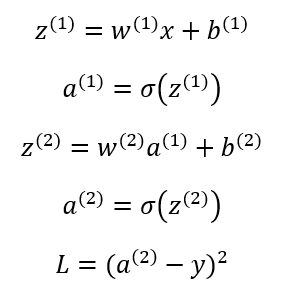

To derive update rule, we have to find following terms (we need update weights and biases).

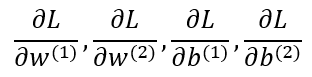

To find these terms I will apply chain rule. All calculations presented below

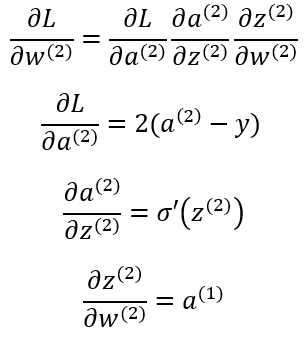

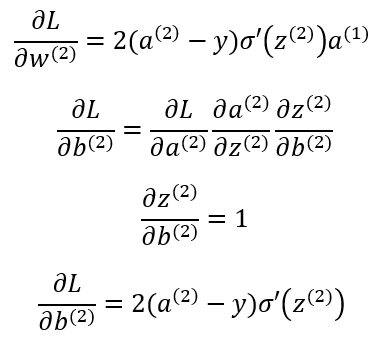

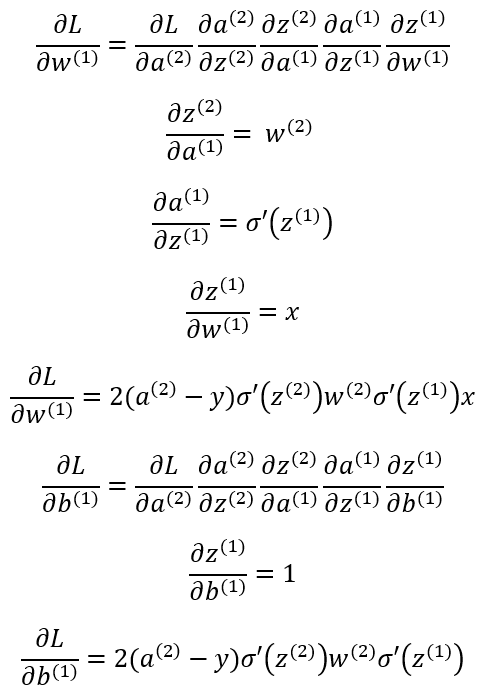

So, update rule will follow:

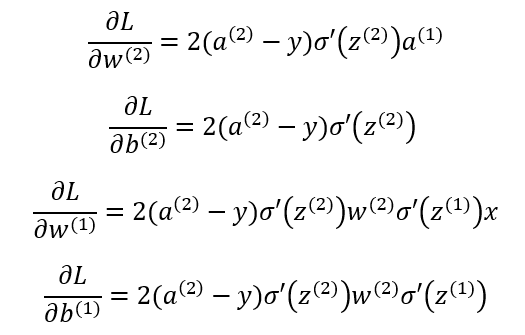

The difference, which i see between applying log-loss error and MSE error is that MSE error drive learning 2 times faster.

--------- end of a first problem --------------

--------- start of a second problem --------------

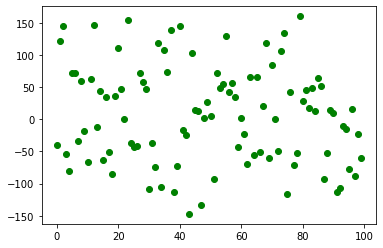

In [2]:
# Define given data
x = np.loadtxt("X_train.csv")
y = np.loadtxt("Y_train.csv")
plt.plot(y, 'go')
plt.show()


**Answer to the first question:**


I see that training output in range [-150;150]. So, I will use linear activation function for output layer to let our network output these numbers. 

In [3]:
print(f'X\'s shape is {np.shape(x)}')
print(f'Y\'s shape is {np.shape(y)}')

X's shape is (100, 2)
Y's shape is (100,)


**Answer to the second question:**

I will use three neurons in hidden layer and one in output layer, since we have 100 entries for 2 features and 100 values in output data. For that I will initialize weights and biases for every neuron.

Let's do forward pass.

In [4]:
# Define weights and biases
def initialize_parameters(number_of_inner_neurons):
  # three neurons in first layer
  W1 = np.random.rand(number_of_inner_neurons,2)
  b1 = np.random.rand(number_of_inner_neurons,1)

  # output neuron in second layer
  W2 = np.random.rand(number_of_inner_neurons,1)
  b2 = np.random.rand(1,1)
  return W1, W2, b1, b2

In [5]:
W1, W2, b1, b2 = initialize_parameters(3)
# Fwd Pass
z1 = np.dot(W1,x.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2.T,a1) + b2
a2 = z2
 # Initial output
m=100
mse = np.sum((a2-y)**2)/(2*m)
print(f"MSE is equal to {mse}")

MSE is equal to 2837.6864257468637


Our model based on random values resulted MSE as mentioned (it is quite big). Now we need to update weights and biases using backpropagation.

In [6]:
# Backward pass

# Compute gradients
dz2 = (a2 - y)/m
dW2 = np.dot(a1,dz2.T)
db2 = np.sum(dz2)
dz1 = W2*dz2*sigmoid_derivative(z1)
dW1 = np.dot(dz1,x)
db1 = np.sum(dz1, axis = 1).reshape(3,1)


In [7]:
 # Update weights
W1 = W1 - dW1
W2 = W2 - dW2
b1 = b1 - db1
b2 = b2 - db2

**Answer to the 3rd question:**

For model tested I have reported  average MSE and accuracy. As it not quitely proper to calculate accuracy for regression task (which we have here), i will use root mean suare error divided by maximum value (let it be 150).

In [8]:
# Fwd Pass
z1 = np.dot(W1,x.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2.T,a1) + b2
a2 = z2
 # Initial output
#print("Prediction:", a2, "Actual:", y)
m=100
mse = np.sum((a2-y)**2)/(2*m)
accuracy = np.sum(1-(np.sqrt((a2-y)**2)/150))/m
print(f"MSE is equal to {mse}. Accuracy is {accuracy}")

MSE is equal to 2154.7078798036378. Accuracy is 0.6406530291631062


After updating weights and biases MSE becomes smaller, so we can implement this code to train our network until convergence. I will define a function for that and apply it.

In [9]:
def forward_pass(x, W1, W2, b1, b2):
  z1 = np.dot(W1,x.T) + b1
  a1 = sigmoid(z1)

  z2 = np.dot(W2.T,a1) + b2
  a2 = z2
  return z1,a1,z2,a2


In [10]:
def train_network(x, y, W1, W2, b1, b2, lr, n_it, n_n, output_console=True):
  z1,a1,z2,a2 = forward_pass(x, W1, W2, b1, b2)
  m=y.shape[0]
  mse = np.zeros(n_it,)
  accuracy = np.zeros(n_it,)
  # Backward pass
  for i in range(n_it):
    # Compute gradients
    dz2 = (a2 - y)/m
    dW2 = np.dot(a1,dz2.T)
    db2 = np.sum(dz2)
    dz1 = W2*dz2*sigmoid_derivative(z1)
    dW1 = np.dot(dz1,x)
    db1 = np.sum(dz1, axis = 1).reshape(n_n,1)
    # Update weights and biases
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2

    z1,a1,z2,a2 = forward_pass(x, W1, W2, b1, b2)
    
    m=y.shape[0]
    mse[i] = np.sum((a2-y)**2)/(2*m)
    accuracy[i] = np.sum(1-(np.sqrt((a2-y)**2)/150))/m
    #print(f"MSE is equal to {mse[i]}, iteration #{i+1}, learning rate is {lr}")
    
  if output_console:
    print(f"MSE is equal to {mse[i]}, iteration #{i+1}, learning rate is {lr}, accuracy is {accuracy[i]}")
  prediction = a2
  return W1, W2, b1, b2, prediction, mse, accuracy


**Answer to the 4th question:**



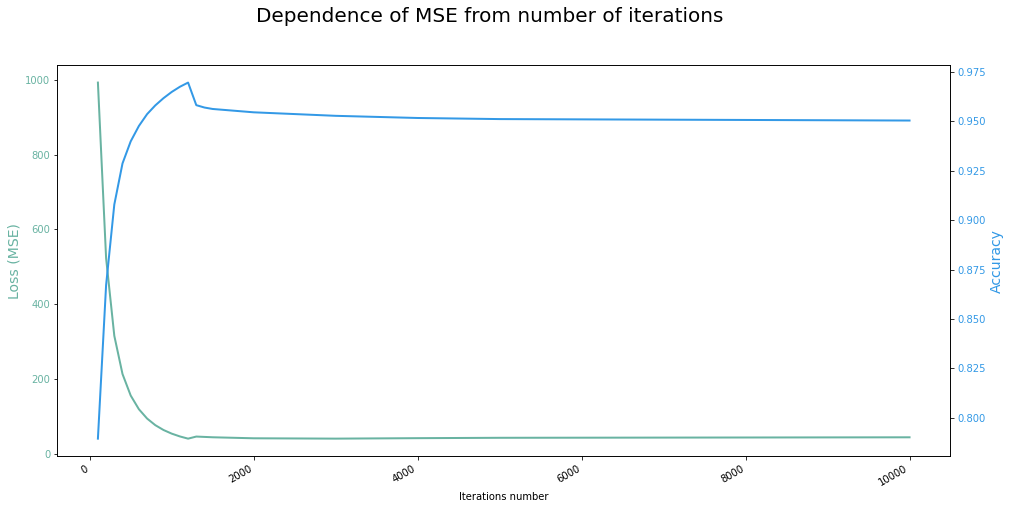

In [11]:
W1, W2, b1, b2 = initialize_parameters(3)

various_iterations_number = np.arange(100,1600,100) 
various_iterations_number = np.append(various_iterations_number, [2000,3000,4000,5000,10000])
mse_plot = np.zeros(np.shape(various_iterations_number))
accuracy_plot = np.zeros(np.shape(various_iterations_number))
j=0
for i in various_iterations_number:
  __, __, __, __, __, mse, accuracy = train_network(x, y, W1, W2, b1, b2, 0.02, i, 3, output_console=False)
  mse_plot[j]=mse[len(mse)-1]
  accuracy_plot[j]=accuracy[len(accuracy)-1]
  j+=1

# setting the plot
COLOR_MSE = "#69b3a2"
COLOR_ACC = "#3399e6"

fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(various_iterations_number, mse_plot, color=COLOR_MSE, lw=2)
ax2.plot(various_iterations_number, accuracy_plot, color=COLOR_ACC, lw=2)

ax1.set_xlabel("Iterations number")
ax1.set_ylabel("Loss (MSE)", color=COLOR_MSE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_MSE)

ax2.set_ylabel("Accuracy", color=COLOR_ACC, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_ACC)

fig.suptitle("Dependence of MSE from number of iterations", fontsize=20)
fig.autofmt_xdate()



**Answer to the 5th question:**

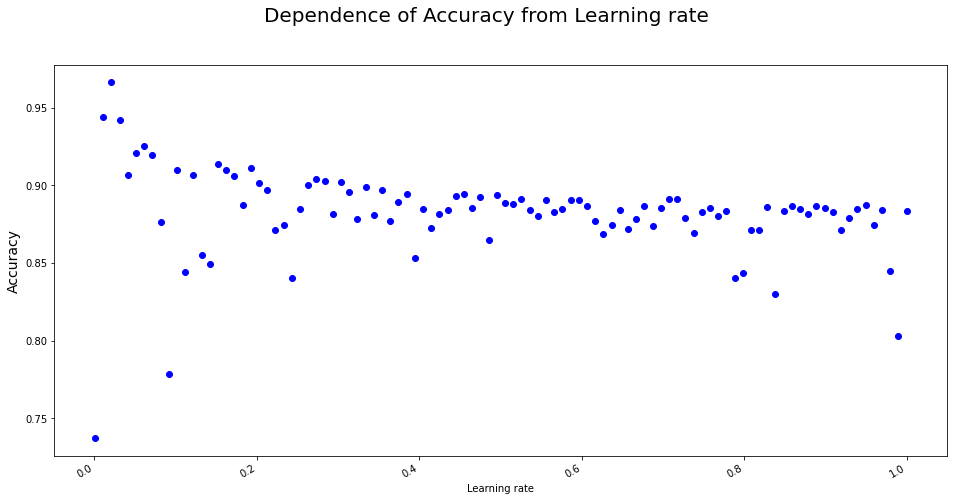

In [12]:
W1, W2, b1, b2 = initialize_parameters(3)

various_lr = np.linspace(0.001, 1.0, num=100)
accuracy_plot = np.zeros(np.shape(various_lr))
j=0
for i in various_lr:
  __, __, __, __, __, __, accuracy = train_network(x, y, W1, W2, b1, b2, i, 1000, 3, output_console=False)
  accuracy_plot[j]=accuracy[len(accuracy)-1]
  j+=1

fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(various_lr, accuracy_plot, 'bo')
ax1.set_xlabel("Learning rate")
ax1.set_ylabel("Accuracy", fontsize=14)
ax1.tick_params(axis="y")

fig.suptitle("Dependence of Accuracy from Learning rate", fontsize=20)
fig.autofmt_xdate()

As we can see, accuracy becoming lower with learning rate increase. Also, there a lot of below-of-trend dots. That indicates how crucial is to choose learning rate properly.

**Answer to the 6 question:**


As you could mention I have designed function for various number of hidden neurons. I have done this to test which composition will work better. For that I will plot the learning perfomance (based on MSE) of my network composed from different number neurons in hidden layer.

In [13]:
def show_mse_change_for_2_layer_regr_nn(number_of_hidden_neurons):
  n_of_iterations = 5000
  W1, W2, b1, b2 = initialize_parameters(number_of_hidden_neurons)
  print(f"Results of learning network with {number_of_hidden_neurons} hidden neurons")
  __, __, __, __, __, mse1, __ = train_network(x, y, W1, W2, b1, b2, 0.002, n_of_iterations, number_of_hidden_neurons)
  __, __, __, __, __, mse2, __ = train_network(x, y, W1, W2, b1, b2, 0.02, n_of_iterations, number_of_hidden_neurons)
  __, __, __, __, __, mse3, __ = train_network(x, y, W1, W2, b1, b2, 0.1, n_of_iterations, number_of_hidden_neurons)
  plt.plot(mse1, label='learning rate is 0.002')
  plt.plot(mse2, label='learning rate is 0.02')
  plt.plot(mse3, label='learning rate is 0.1')
  plt.title(f"Learning network with {number_of_hidden_neurons} hidden neurons")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

**Answer to the 6a question:**

Update rule of the neural network doesn't change, since we use same activation functions. Only thing that change is dimensions of our values - weights, biases and their derivartives.

Results of learning network with 1 hidden neurons
MSE is equal to 490.4566041639502, iteration #5000, learning rate is 0.002, accuracy is 0.8616845024185441
MSE is equal to 428.08920532418335, iteration #5000, learning rate is 0.02, accuracy is 0.8508105570945397
MSE is equal to 690.7949180635532, iteration #5000, learning rate is 0.1, accuracy is 0.7953092959119608


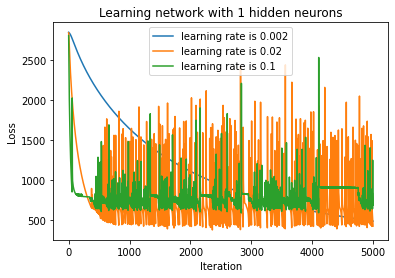

Results of learning network with 2 hidden neurons
MSE is equal to 229.90624745764788, iteration #5000, learning rate is 0.002, accuracy is 0.9168902326596167
MSE is equal to 179.22347447667497, iteration #5000, learning rate is 0.02, accuracy is 0.8940218963798096
MSE is equal to 310.95673281236276, iteration #5000, learning rate is 0.1, accuracy is 0.8569383127376001


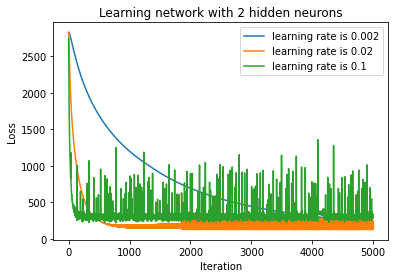

Results of learning network with 3 hidden neurons
MSE is equal to 155.3087174392855, iteration #5000, learning rate is 0.002, accuracy is 0.939532317020144
MSE is equal to 38.407642530816744, iteration #5000, learning rate is 0.02, accuracy is 0.9528215320249597
MSE is equal to 132.12825635908646, iteration #5000, learning rate is 0.1, accuracy is 0.9111091986817783


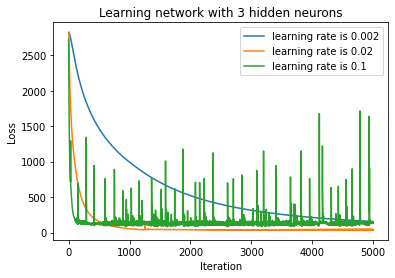

Results of learning network with 4 hidden neurons
MSE is equal to 122.24747604776984, iteration #5000, learning rate is 0.002, accuracy is 0.9528920280880459
MSE is equal to 9.754838135972694, iteration #5000, learning rate is 0.02, accuracy is 0.9790037353394916
MSE is equal to 79.50051946063398, iteration #5000, learning rate is 0.1, accuracy is 0.9349571964279936


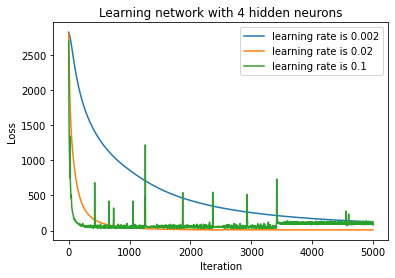

Results of learning network with 5 hidden neurons
MSE is equal to 106.36920396859126, iteration #5000, learning rate is 0.002, accuracy is 0.9559659444305499
MSE is equal to 2.7921353506539135, iteration #5000, learning rate is 0.02, accuracy is 0.993533699922536
MSE is equal to 31.237391019345228, iteration #5000, learning rate is 0.1, accuracy is 0.9604385012305033


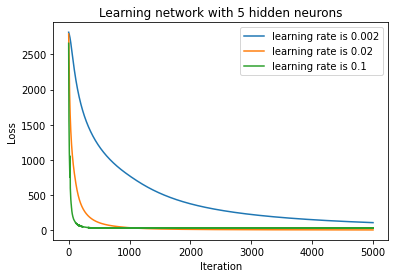

Results of learning network with 6 hidden neurons
MSE is equal to 96.12482554851475, iteration #5000, learning rate is 0.002, accuracy is 0.9598653693749069
MSE is equal to 2.2249548750352157, iteration #5000, learning rate is 0.02, accuracy is 0.994951625735136
MSE is equal to 21.719534909885006, iteration #5000, learning rate is 0.1, accuracy is 0.964171219875539


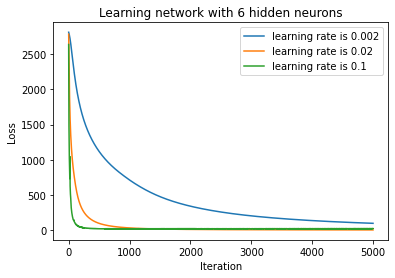

Results of learning network with 7 hidden neurons
MSE is equal to 89.68761196374886, iteration #5000, learning rate is 0.002, accuracy is 0.962048524244687
MSE is equal to 1.8894097814165443, iteration #5000, learning rate is 0.02, accuracy is 0.9964016637508009
MSE is equal to 6.2280932667677655, iteration #5000, learning rate is 0.1, accuracy is 0.9798654301920603


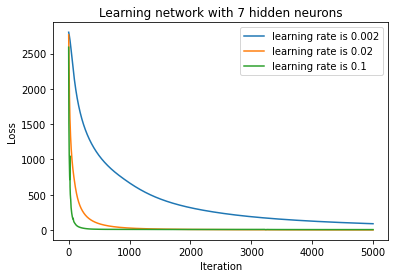

Results of learning network with 8 hidden neurons
MSE is equal to 85.67967531732963, iteration #5000, learning rate is 0.002, accuracy is 0.9627240191880833
MSE is equal to 1.7291919992129428, iteration #5000, learning rate is 0.02, accuracy is 0.9971810426392573
MSE is equal to 2.324710295870031, iteration #5000, learning rate is 0.1, accuracy is 0.9875855196096924


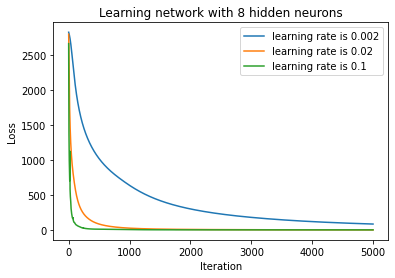

Results of learning network with 9 hidden neurons
MSE is equal to 81.97627766862978, iteration #5000, learning rate is 0.002, accuracy is 0.9638191892818639
MSE is equal to 1.7478688175310848, iteration #5000, learning rate is 0.02, accuracy is 0.9969787495261359
MSE is equal to 1.827826129043362, iteration #5000, learning rate is 0.1, accuracy is 0.9893750095004546


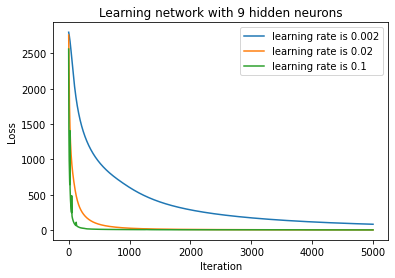

Results of learning network with 10 hidden neurons
MSE is equal to 80.22161124133167, iteration #5000, learning rate is 0.002, accuracy is 0.9631468725329859
MSE is equal to 1.6326549664046122, iteration #5000, learning rate is 0.02, accuracy is 0.9974495265702396
MSE is equal to 1.339997940411156, iteration #5000, learning rate is 0.1, accuracy is 0.9907784781408456


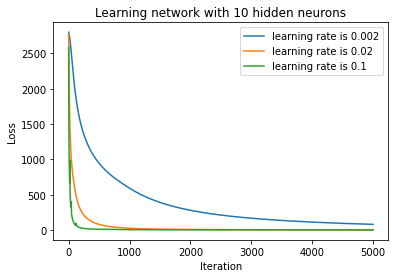

In [14]:
for i in range(10):
  show_mse_change_for_2_layer_regr_nn(i+1)

**Answer to the 6b question:**

Based on reported data I assume that convergent neural network could be trained with 5 hidden neurons after 5000 iteraions and 0.02 learning rate. While we have significantly smaller MSE in more complex model (which has 10 neurons, for example), it is, in my opinion, overfitted.

So, I will train my network and validate it on test data.

In [15]:
n_of_iterations = 5000
number_of_hidden_neurons = 5
W1, W2, b1, b2 = initialize_parameters(number_of_hidden_neurons)
W1, W2, b1, b2, __, __, __ = train_network(x, y, W1, W2, b1, b2, 0.02, n_of_iterations, number_of_hidden_neurons)

MSE is equal to 2.786318599459573, iteration #5000, learning rate is 0.02, accuracy is 0.9935429967552234


In [16]:
x_test = np.loadtxt("X_test.csv")
y_test = np.loadtxt("Y_test.csv")

# Fwd Pass
_,_,_,a2 = forward_pass(x_test, W1, W2, b1, b2)
#computing Losses
m=y_test.shape[0]
mse = np.sum((a2-y_test)**2)/(2*m)
accuracy = np.sum(1-(np.sqrt((a2-y_test)**2)/150))/m
print(f"MSE is equal to {mse}. Accuracy is {accuracy}")

MSE is equal to 32.91830126308876. Accuracy is 0.98364997906165


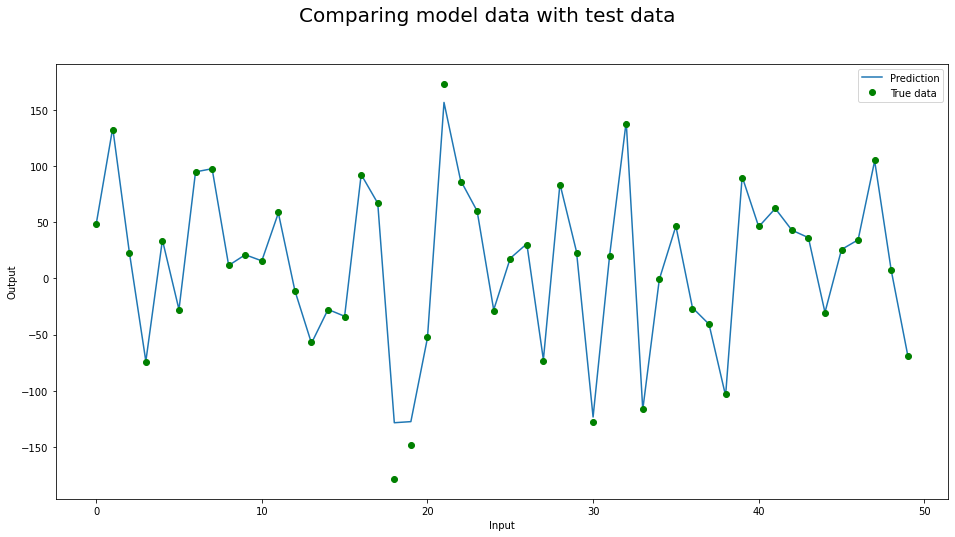

In [17]:
# plotting the results

fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(a2.flatten(), label='Prediction')
ax1.plot(y_test, 'go', label='True data')
ax1.set_xlabel("Input")
ax1.set_ylabel("Output")
ax1.tick_params(axis="y")
ax1.legend()

fig.suptitle("Comparing model data with test data", fontsize=20)
fig.show()

**Answer to the 7th question:**

Main purpose of activation function is not to let our model parameters go far away, limits outputs of layers in particular range. So, depends of our exceptations we choose suitable activation function.

a. Yes we need to change update rule, since derivative of activation function changes.

b. I need to change update rule by replacing derivative of hidden layer and, of course, forward pass algorithm.


To explore two different activation functions for my model, i will design new function.

In [18]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
  return 1-tanh(x)**2

In [19]:
def relu(x):
	return(np.maximum(0, x))
 
def relu_derivative(x):
     return (x>0)*np.ones(x.shape)

In [20]:
def forward_pass_extended(x, W1, W2, b1, b2, act = "sigmoid"):
  z1 = np.dot(W1,x.T) + b1
  if act == "sigmoid":
    a1 = sigmoid(z1)
  else: 
    if act == "ReLU":
      a1 = relu(z1)
    else:
        if act == "tanh":
          a1 = tanh(z1)

  z2 = np.dot(W2.T,a1) + b2
  a2 = z2
  return z1,a1,z2,a2

In [21]:
def train_network(x, y, W1, W2, b1, b2, lr, n_it, n_n, activation = "sigmoid", output_console=True):
  z1,a1,z2,a2 = forward_pass_extended(x, W1, W2, b1, b2, act = activation)
  m=y.shape[0]
  mse = np.zeros(n_it,)
  accuracy = np.zeros(n_it,)
  # Backward pass
  for i in range(n_it):
    # Compute gradients
    dz2 = (a2 - y)/m
    dW2 = np.dot(a1,dz2.T)
    db2 = np.sum(dz2)
    if activation == "sigmoid":
      dz1 = W2*dz2*sigmoid_derivative(z1)
    else: 
      if activation == "ReLU":
        dz1 = W2*dz2*relu_derivative(z1)
      else:
        if activation == "tanh":
          dz1 = W2*dz2*tanh_derivative(z1)
    
    dW1 = np.dot(dz1,x)
    db1 = np.sum(dz1, axis = 1).reshape(n_n,1)
    # Update weights and biases
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2

    z1,a1,z2,a2 = forward_pass_extended(x, W1, W2, b1, b2, act = activation)
    
    m=y.shape[0]
    mse[i] = np.sum((a2-y)**2)/(2*m)
    accuracy[i] = np.sum(1-(np.sqrt((a2-y)**2)/150))/m
    #print(f"MSE is equal to {mse[i]}, iteration #{i+1}, learning rate is {lr}")
    
  if output_console:
    print(f"MSE is equal to {mse[i]}, iteration #{i+1}, learning rate is {lr}, accuracy is {accuracy[i]}")
  prediction = a2
  return W1, W2, b1, b2, prediction, mse, accuracy


Results of training neural network using ReLU activation
MSE is equal to 2826.109119274572, iteration #5000, learning rate is 0.02, accuracy is 0.578600830074639
Results of validating neural network (ReLU activation) with test data
MSE is equal to 2758.0461769574545. Accuracy is 0.6055348894792222


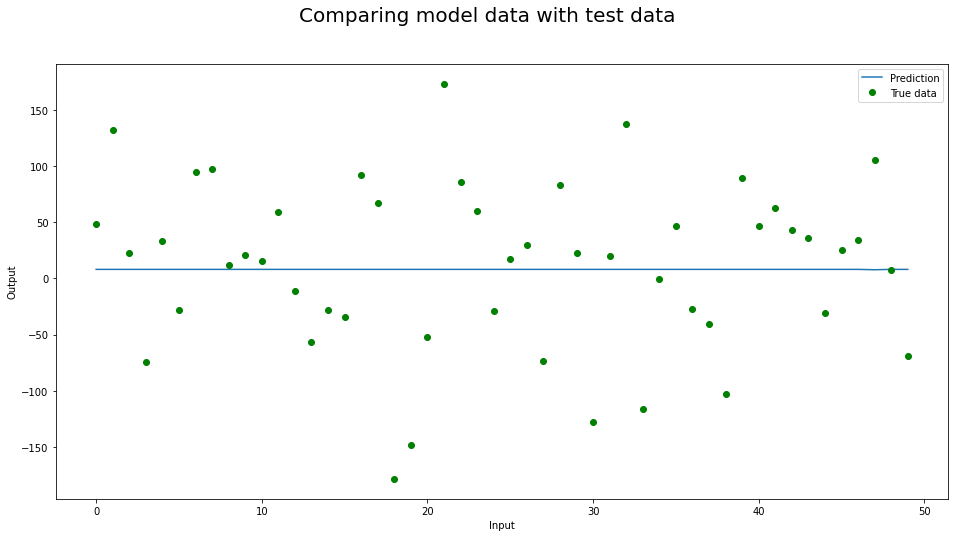

In [22]:
n_of_iterations = 5000
number_of_hidden_neurons = 5

W1, W2, b1, b2 = initialize_parameters(number_of_hidden_neurons)
print(f"Results of training neural network using ReLU activation")
W1, W2, b1, b2, __, __, __ = train_network(x, y, W1, W2, b1, b2, 0.02, n_of_iterations, number_of_hidden_neurons, activation = "ReLU")

# Fwd Pass
_,_,_,a2 = forward_pass_extended(x_test, W1, W2, b1, b2, act = "ReLU")
#computing Losses
m=y_test.shape[0]
mse = np.sum((a2-y_test)**2)/(2*m)
accuracy = np.sum(1-(np.sqrt((a2-y_test)**2)/150))/m
print(f"Results of validating neural network (ReLU activation) with test data")
print(f"MSE is equal to {mse}. Accuracy is {accuracy}")

# plotting the results

fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(a2.flatten(), label='Prediction')
ax1.plot(y_test, 'go', label='True data')
ax1.set_xlabel("Input")
ax1.set_ylabel("Output")
ax1.tick_params(axis="y")
ax1.legend()

fig.suptitle("Comparing model data with test data", fontsize=20)
fig.show()


So, ReLU activation isn't suitable for that model.

Results of training neural network using tanh activation
MSE is equal to 25.993580204442743, iteration #5000, learning rate is 0.02, accuracy is 0.9611703054552381
Results of validating neural network (tanh activation) with test data
MSE is equal to 55.96882925855438. Accuracy is 0.9584850165789418


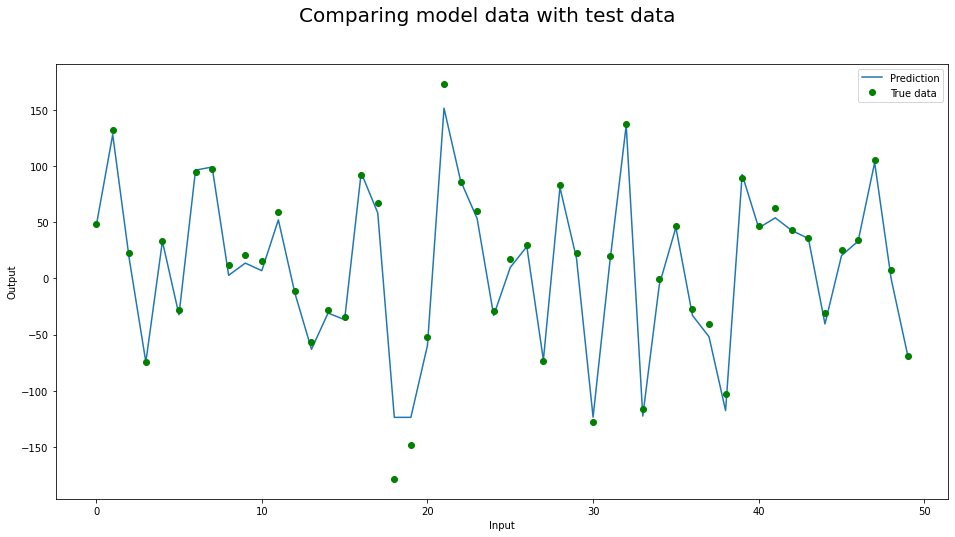

In [23]:
# weights and biases in first layer
W1 = np.random.rand(number_of_hidden_neurons,2)
b1 = np.random.rand(number_of_hidden_neurons,1)

# weights and biases in second layer
W2 = np.random.rand(number_of_hidden_neurons,1)
b2 = np.random.rand(1,1)
print(f"Results of training neural network using tanh activation")
W1, W2, b1, b2, __, __, __ = train_network(x, y, W1, W2, b1, b2, 0.02, n_of_iterations, number_of_hidden_neurons, activation = "tanh")

# Fwd Pass
_,_,_,a2 = forward_pass_extended(x_test, W1, W2, b1, b2, act = "tanh")
#computing Losses
m=y_test.shape[0]
mse = np.sum((a2-y_test)**2)/(2*m)
accuracy = np.sum(1-(np.sqrt((a2-y_test)**2)/150))/m
print(f"Results of validating neural network (tanh activation) with test data")
print(f"MSE is equal to {mse}. Accuracy is {accuracy}")

# plotting the results

fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(a2.flatten(), label='Prediction')
ax1.plot(y_test, 'go', label='True data')
ax1.set_xlabel("Input")
ax1.set_ylabel("Output")
ax1.tick_params(axis="y")
ax1.legend()

fig.suptitle("Comparing model data with test data", fontsize=20)
fig.show()

So, it is better than ReLU activation. So, tanh is suitable for our model while it has slightly less accuracy than sigmoid-powered model.

--------- end of a second problem --------------